# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Davit Barblishvili

## DB3230

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
pd.set_option('display.max_columns', None)



In [2]:
header_list = ["idLobbyGame", "idPlayer", "idRooom", "qtKill", "qtAssist", "qtDeath", "qtHs", "qtBombeDefuse", 
               "qtBombePlant", "qtTk", "qtTkAssist", "qt1Kill", "qt2Kill", "qt3Kill", "qt4Kill", "qt5Kill", 
               "qtPlusKill", "qtFirstKill", "vlDamage", "qtHits", "qtShots", "qtLastAlive", "qtClutchWon", 
               "qtRoundsPlayed", "descMapName", "vlLevel", "qtSurvived", "qtTrade", "qtFlashAssist", 
               "qtHitHeadshot", "qtHitChest", "qtHitStomach", "qtHitLeftAtm", "qtHitRightArm", "qtHitLeftLeg", 
               "qtHitRightLeg", "flWinner","dtCreatedAt"]


In [3]:
df = pd.read_csv(r'tb_lobby_stats_player.csv', names=header_list, low_memory=False)
df = df.iloc[1:]
df.head(100)

,idLobbyGame,idPlayer,idRooom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
1,1,1,1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
2,2,1,2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
3,3,2,3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
4,3,391,27508,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
5,4,2,4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,89,3,89,36,4,31,12,3,1,0.0,0.0,6,9,4,0,0,0,2,3950,100.0,792,3.0,2,42,de_vertigo,14,8.0,7.0,0.0,15.0,42.0,27.0,4.0,7.0,1.0,4.0,1,2022-01-26 22:54:39
97,90,3,90,14,2,18,5,1,0,0.0,0.0,10,2,0,0,0,0,2,1813,52.0,336,0.0,0,27,de_vertigo,14,8.0,1.0,0.0,5.0,25.0,17.0,1.0,3.0,0.0,1.0,0,2022-01-27 22:14:59
98,91,3,91,22,7,24,10,0,0,0.0,0.0,6,8,0,0,0,0,3,3041,81.0,354,0.0,0,26,de_mirage,14,2.0,4.0,0.0,14.0,26.0,24.0,2.0,9.0,3.0,3.0,0,2022-01-30 18:16:56
99,92,3,92,20,6,10,5,0,2,0.0,0.0,12,1,2,0,0,0,3,2390,64.0,301,0.0,0,24,de_vertigo,14,14.0,4.0,0.0,5.0,35.0,12.0,0.0,8.0,2.0,2.0,1,2022-01-30 19:03:56


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

In [4]:
# calculating the percentages of na values in each column 
percentages = df.isna().mean().round(4) * 100

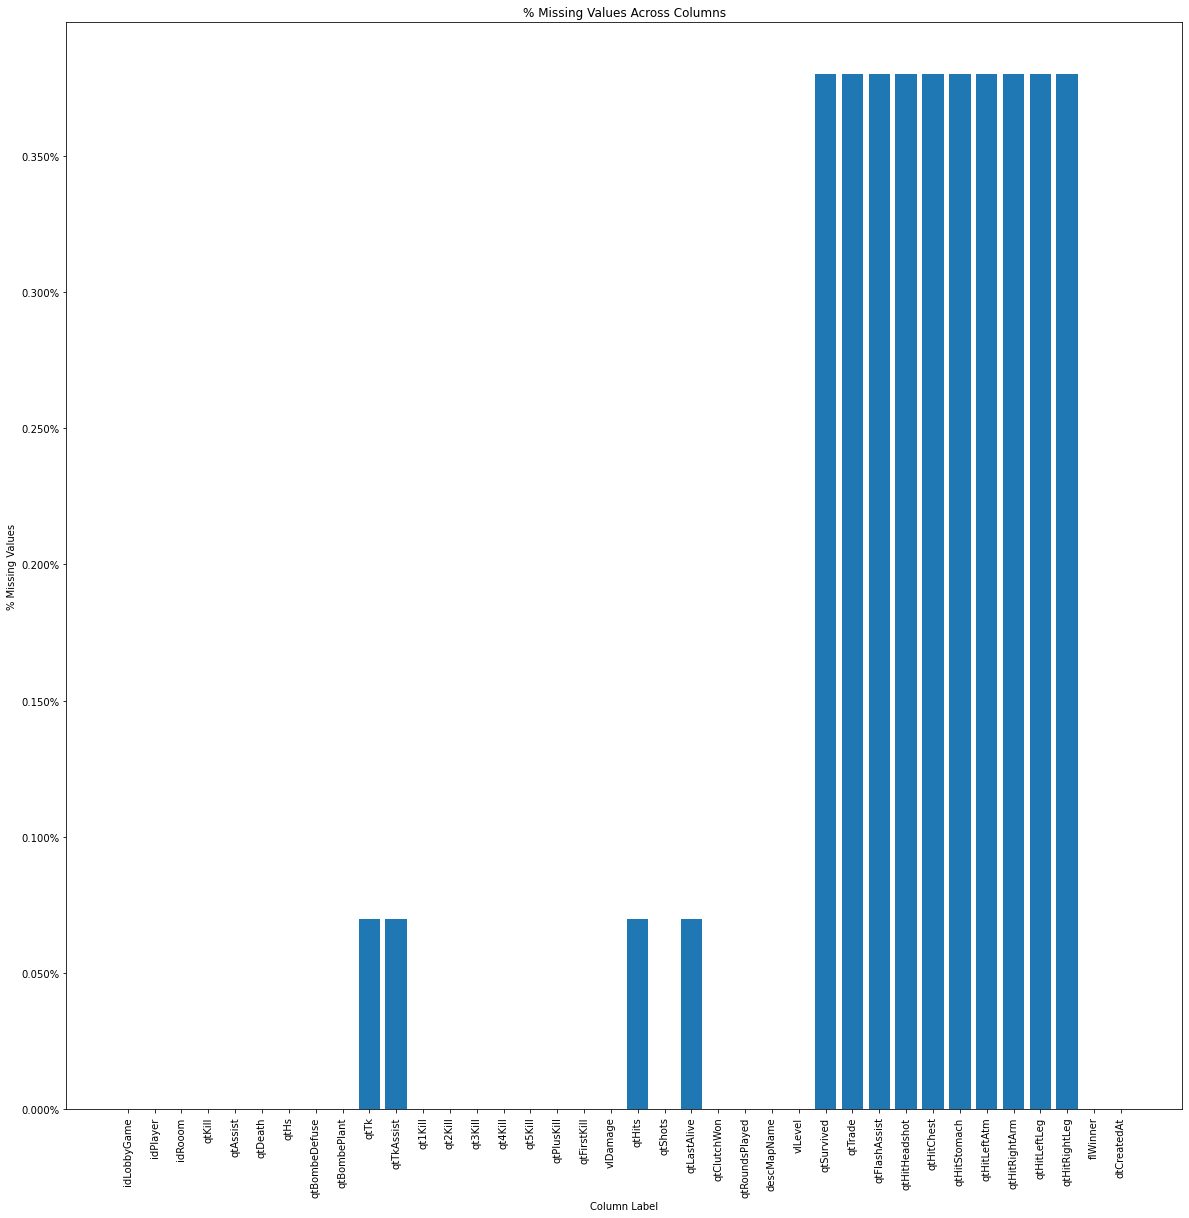

In [5]:
# plotting percentages
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
features = header_list[:]
x_pos = [i for i, _ in enumerate(percentages)]

plt.bar(x_pos, percentages)
plt.xticks(x_pos, features, rotation='vertical')
plt.ylabel('% Missing Values')
plt.xlabel('Column Label')
plt.title('% Missing Values Across Columns')
plt.show()

In [6]:
# removing rows with missing values
# since none of the column have a significantly large missing values, 
# I decided to drop the rows instead of any specific columns. The highest missing percentage is
# 0.4% and I do not think it is large enough to consider dropping the entire column. 
# hence droppin the rows with at least 1 missing value, I believe fixes this problem.
df  = df.dropna()

In [7]:
df

,idLobbyGame,idPlayer,idRooom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
1,1,1,1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
2,2,1,2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
3,3,2,3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
4,3,391,27508,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
5,4,2,4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184148,172907,2716,178496,21,3,13,5,1,1,0.0,0.0,8,5,1,0,0,0,3,2610,88.0,524,1.0,0,26,de_vertigo,9,11.0,0.0,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1,2021-11-27 16:47:57
184149,172908,2716,178497,15,1,22,5,0,1,0.0,0.0,11,2,0,0,0,0,5,2154,63.0,357,0.0,0,29,de_nuke,9,7.0,5.0,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1,2021-12-10 01:08:48
184150,172909,2716,178498,9,6,23,2,0,3,0.0,0.0,9,0,0,0,0,0,2,1701,59.0,371,0.0,0,27,de_vertigo,9,4.0,2.0,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0,2022-01-09 21:01:10
184151,172910,2716,178499,15,5,20,6,0,2,0.0,0.0,13,1,0,0,0,0,1,2246,65.0,355,0.0,0,25,de_dust2,9,5.0,3.0,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0,2022-01-14 17:42:37


In [8]:
percentages_test = df.isna().mean().round(4) * 100

In [9]:
percentages_test

idLobbyGame       0.0
idPlayer          0.0
idRooom           0.0
qtKill            0.0
qtAssist          0.0
qtDeath           0.0
qtHs              0.0
qtBombeDefuse     0.0
qtBombePlant      0.0
qtTk              0.0
qtTkAssist        0.0
qt1Kill           0.0
qt2Kill           0.0
qt3Kill           0.0
qt4Kill           0.0
qt5Kill           0.0
qtPlusKill        0.0
qtFirstKill       0.0
vlDamage          0.0
qtHits            0.0
qtShots           0.0
qtLastAlive       0.0
qtClutchWon       0.0
qtRoundsPlayed    0.0
descMapName       0.0
vlLevel           0.0
qtSurvived        0.0
qtTrade           0.0
qtFlashAssist     0.0
qtHitHeadshot     0.0
qtHitChest        0.0
qtHitStomach      0.0
qtHitLeftAtm      0.0
qtHitRightArm     0.0
qtHitLeftLeg      0.0
qtHitRightLeg     0.0
flWinner          0.0
dtCreatedAt       0.0
dtype: float64

In [10]:
# dropping the target column 
feature_df = df.drop('flWinner', axis=1)

# removing dtCreated column
feature_df = feature_df.drop('dtCreatedAt', axis=1)

# removing lobby id
feature_df = feature_df.drop('idLobbyGame', axis=1)

# removing player id
feature_df = feature_df.drop('idPlayer', axis=1)

# removing room id
feature_df = feature_df.drop('idRooom', axis=1)

**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

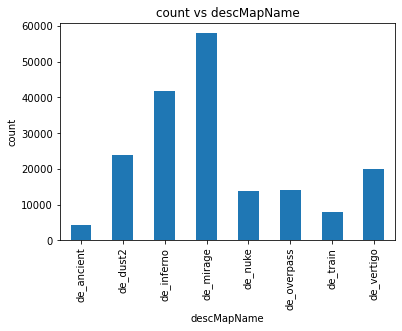

In [11]:
plt.figure()
count=0
columns_to_plot = ['descMapName']
for col in columns_to_plot:
    df[col].value_counts().sort_index().plot(
        kind='bar', rot='vertical', ylabel='count',
        xlabel=col, title="count vs %s"%col)
    plt.show()

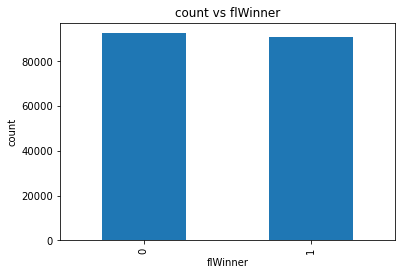

In [12]:
plt.figure()
count=0
columns_to_plot = ['flWinner']
for col in columns_to_plot:
    df[col].value_counts().sort_index().plot(
        kind='bar', rot='vertical', ylabel='count',
        xlabel=col, title="count vs %s"%col)
    plt.show()

In [13]:
feature_df

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg
1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0
2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0
3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0
4,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0
5,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184148,21,3,13,5,1,1,0.0,0.0,8,5,1,0,0,0,3,2610,88.0,524,1.0,0,26,de_vertigo,9,11.0,0.0,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0
184149,15,1,22,5,0,1,0.0,0.0,11,2,0,0,0,0,5,2154,63.0,357,0.0,0,29,de_nuke,9,7.0,5.0,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0
184150,9,6,23,2,0,3,0.0,0.0,9,0,0,0,0,0,2,1701,59.0,371,0.0,0,27,de_vertigo,9,4.0,2.0,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0
184151,15,5,20,6,0,2,0.0,0.0,13,1,0,0,0,0,1,2246,65.0,355,0.0,0,25,de_dust2,9,5.0,3.0,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0


**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [14]:
# splitting into 60/20/20
# I am splitting into this way since I think the data I have is enough to use a separate 
# dataset for the caliberation. 
categorical_variables = ['descMapName']

enc = OrdinalEncoder()
ohe = OneHotEncoder(handle_unknown='ignore')
df[['flWinner']] = enc.fit_transform(df[['flWinner']])
df['flWinner'] = df['flWinner'].astype(int)


In [15]:
enc = OrdinalEncoder()
feature_df[categorical_variables] = enc.fit_transform(feature_df[categorical_variables])
feature_df = feature_df.astype(float)
X_dev, X_test, y_dev, y_test = train_test_split(feature_df, df[['flWinner']], random_state=42, test_size=0.2)
X_train, X_calib, y_train, y_calib = train_test_split(X_dev, y_dev, random_state=42, test_size=0.2)



**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

- from the categorical features, I dropped all of them except for the description map name, since 
the remaining categorical features did not have any significant input to the predicting the target variable
when it comes to descmapname, we can apply standard scaler



In [16]:
feature_df.head(100)

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg
1,5.0,1.0,16.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,911.0,25.0,212.0,0.0,0.0,17.0,3.0,10.0,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0
2,24.0,3.0,18.0,6.0,0.0,4.0,0.0,1.0,9.0,4.0,1.0,1.0,0.0,0.0,3.0,2933.0,54.0,597.0,1.0,1.0,27.0,4.0,9.0,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0
3,6.0,4.0,23.0,2.0,0.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,1117.0,31.0,207.0,0.0,0.0,25.0,3.0,2.0,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0
4,10.0,5.0,20.0,4.0,1.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,1740.0,63.0,411.0,1.0,1.0,25.0,3.0,15.0,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0
5,8.0,4.0,26.0,6.0,0.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,1696.0,51.0,324.0,0.0,0.0,30.0,4.0,2.0,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,36.0,4.0,31.0,12.0,3.0,1.0,0.0,0.0,6.0,9.0,4.0,0.0,0.0,0.0,2.0,3950.0,100.0,792.0,3.0,2.0,42.0,7.0,14.0,8.0,7.0,0.0,15.0,42.0,27.0,4.0,7.0,1.0,4.0
97,14.0,2.0,18.0,5.0,1.0,0.0,0.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,2.0,1813.0,52.0,336.0,0.0,0.0,27.0,7.0,14.0,8.0,1.0,0.0,5.0,25.0,17.0,1.0,3.0,0.0,1.0
98,22.0,7.0,24.0,10.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,0.0,0.0,0.0,3.0,3041.0,81.0,354.0,0.0,0.0,26.0,3.0,14.0,2.0,4.0,0.0,14.0,26.0,24.0,2.0,9.0,3.0,3.0
99,20.0,6.0,10.0,5.0,0.0,2.0,0.0,0.0,12.0,1.0,2.0,0.0,0.0,0.0,3.0,2390.0,64.0,301.0,0.0,0.0,24.0,7.0,14.0,14.0,4.0,0.0,5.0,35.0,12.0,0.0,8.0,2.0,2.0


**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [17]:
num_features = ["qtKill", "qtAssist", "qtDeath", "qtHs", "qtBombeDefuse", 
               "qtBombePlant", "qtTk", "qtTkAssist", "qt1Kill", "qt2Kill", "qt3Kill", "qt4Kill", "qt5Kill", 
               "qtPlusKill", "qtFirstKill", "vlDamage", "qtHits", "qtShots", "qtLastAlive", "qtClutchWon", 
               "qtRoundsPlayed","vlLevel", "qtSurvived", "qtTrade", "qtFlashAssist", 
               "qtHitHeadshot", "qtHitChest", "qtHitStomach", "qtHitLeftAtm", "qtHitRightArm", "qtHitLeftLeg", 
               "qtHitRightLeg",]

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from graphviz import Source
clf = DecisionTreeClassifier(random_state=81)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                     remainder="passthrough"
                                    )


In [19]:
pipe = make_pipeline(preprocess,
                    GridSearchCV(clf,
                                param_grid = {},
                                return_train_score=True))
  
pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results.best_score_)
print(f"Best train alpha: ", grid_search_results.best_params_)
print(f"Test score:", pipe.score(X_train, y_train))
plt.figure(figsize=(30,50)) 
best_tree = grid_search_results.best_estimator_

Best train score:  0.7267918742813337
Best train alpha:  {}
Test score: 1.0


<Figure size 2160x3600 with 0 Axes>

In [20]:
categorical_variables = preprocess.named_transformers_["targetencoder"].get_feature_names()
feature_names = num_features + categorical_variables
target_values = ['1', '0']


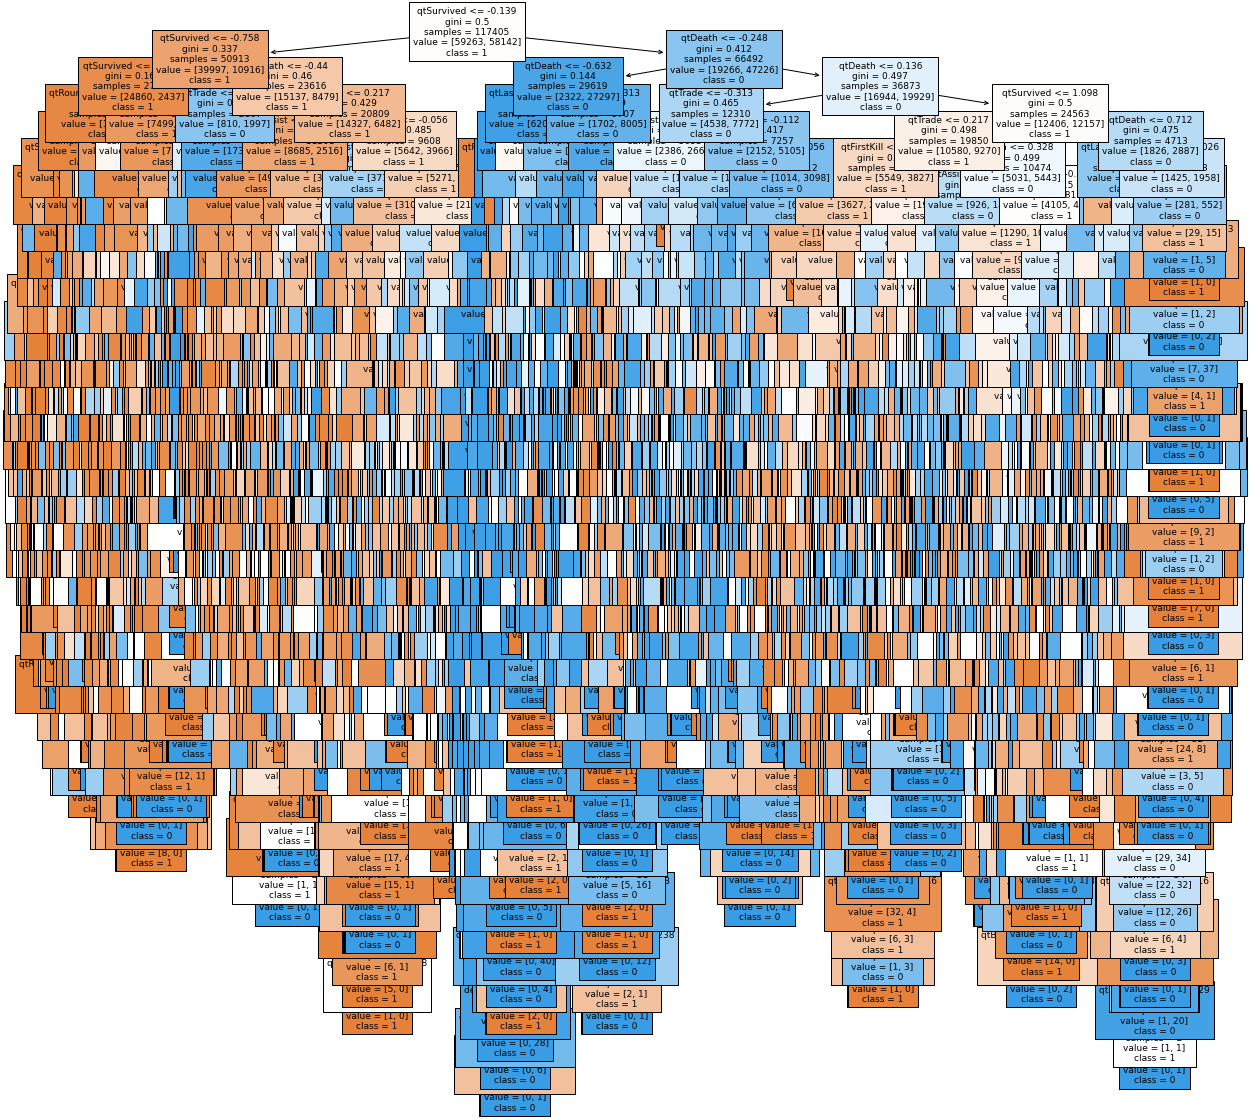

In [21]:
plt.figure(figsize=(20,20))
tree_dot = plot_tree(best_tree, feature_names=feature_names, fontsize=9, filled=True, class_names=target_values)
plt.show()

**1.7: Visualize the trained tree until the max_depth 8**

In [22]:
model = clf.fit(X_train, y_train)
print(tree.export_text(clf))

|--- feature_23 <= 6.50
|   |--- feature_23 <= 4.50
|   |   |--- feature_23 <= 3.50
|   |   |   |--- feature_20 <= 26.50
|   |   |   |   |--- feature_2 <= 10.50
|   |   |   |   |   |--- feature_23 <= 1.50
|   |   |   |   |   |   |--- feature_32 <= 4.50
|   |   |   |   |   |   |   |--- feature_2 <= 5.50
|   |   |   |   |   |   |   |   |--- feature_27 <= 14.00
|   |   |   |   |   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_22 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_22 >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- trun

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

Best train score:  0.7689706571270389
Best train alpha:  {'min_impurity_decrease': 0.001}
Test score: 0.7697192695557372


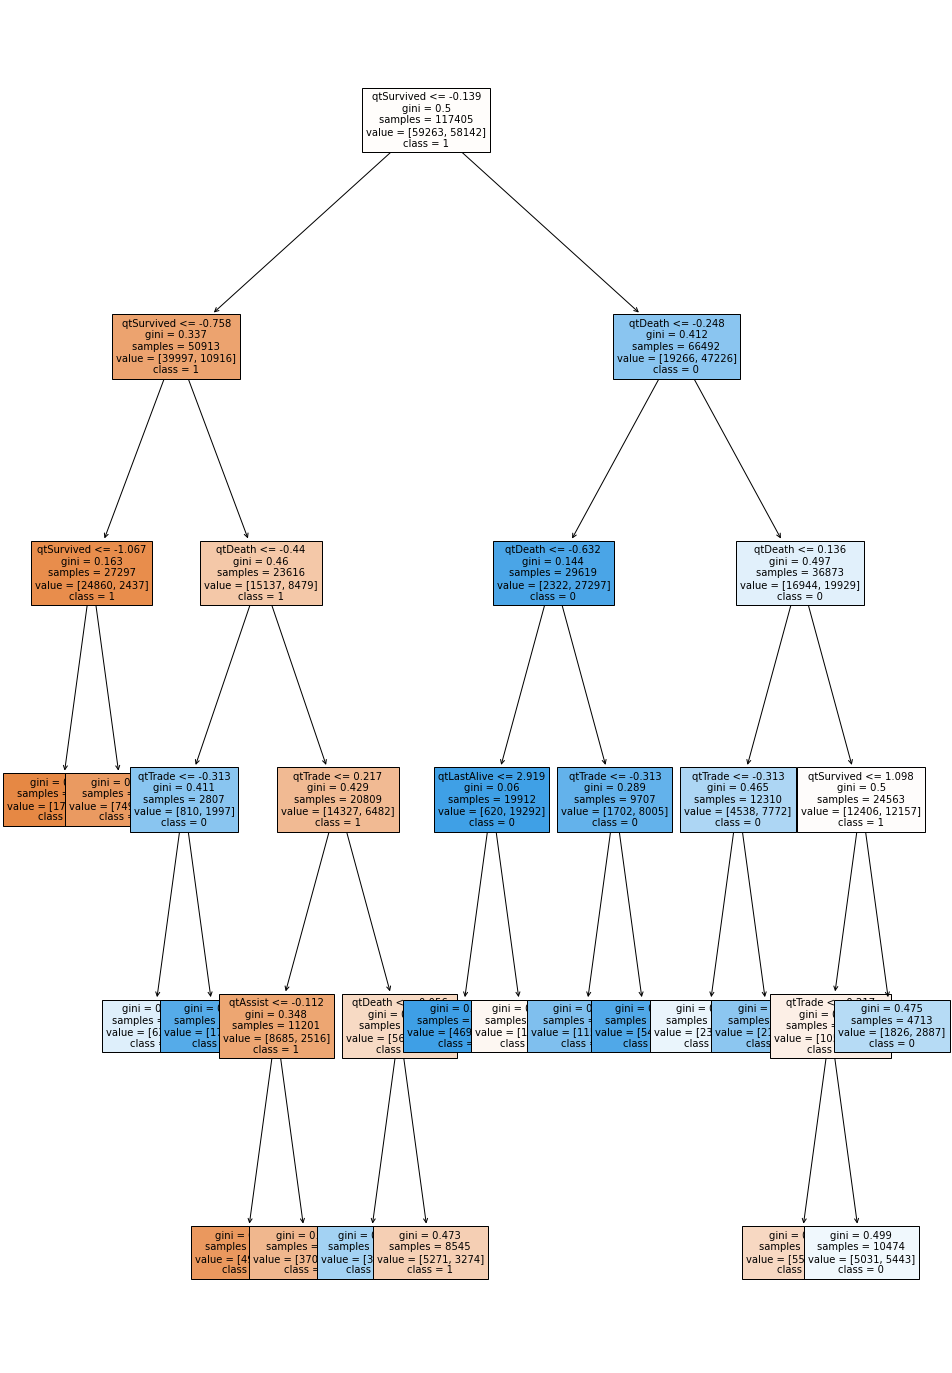

In [23]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
clf = DecisionTreeClassifier(random_state=81)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                     remainder="passthrough"
                                    )
pipe = make_pipeline(preprocess,
                    GridSearchCV(clf,
                                param_grid = [{"min_impurity_decrease":np.logspace(-3,-1,100)}],
                                return_train_score=True))
  
pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results.best_score_)
print(f"Best train alpha: ", grid_search_results.best_params_)
print(f"Test score:", pipe.score(X_test, y_test))
plt.figure(figsize=(16,25)) 
best_tree = grid_search_results.best_estimator_

te_feature_names = preprocess.named_transformers_["targetencoder"].get_feature_names()
feature_names = num_features + te_feature_names
target_values = ["1", "0"]
tree_dot = plot_tree(best_tree, feature_names=feature_names, fontsize=10, filled=True, class_names=target_values)
plt.show()

**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'feature importance across features')

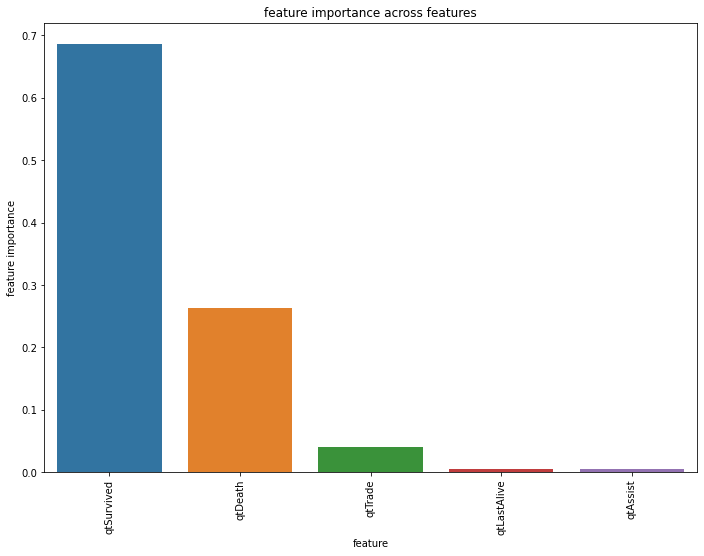

In [24]:
import seaborn as sns
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
te_feature_names = preprocess.named_transformers_["targetencoder"].get_feature_names()
feature_names = num_features +  te_feature_names
feat_imps = zip(feature_names, best_tree.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('feature importance')
ax.set_xlabel('feature')
ax.set_title('feature importance across features')

In [25]:
# I would say qtSurvived and qtDeath are really important features that could be useful to determine
# if an user is going to be a winner or not since they show the player's survival and death rate. However, 
# the third feature, qtTrade, which shows how many time a player killed the opponent after the enemy killed 
# the player's teammate, so I do not think it is a good indication if the player is going to be a winner or not. 

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=81)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                     remainder="passthrough"
                                    )
pipe = make_pipeline(preprocess,
                    GridSearchCV(rf,
                                param_grid = [{}],
                                return_train_score=True))
  
pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results.best_score_)
print(f"Best train alpha: ", grid_search_results.best_params_)
print(f"Test score:", pipe.score(X_test, y_test))


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-

Best train score:  0.7889357352753289
Best train alpha:  {}
Test score: 0.7908421913327882



## RandomForestClassifier
   - Best train score:  0.7889357352753289
   - Best train alpha:  {}
   - Test score: 0.7908421913327882



**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [27]:

#Yes all the trees in random forest have pure leaves. You can verify
#This by plotting individually one (or all) of the trees that comprise
#the random forest, or by looking at the default params on sklearn
#we see that the max_depth default is none, so nodes are expanded
#until all leaves are pure, and the default min_samples_split = 2 
#(so we would split until each leaf has one value if it is not pure yet)

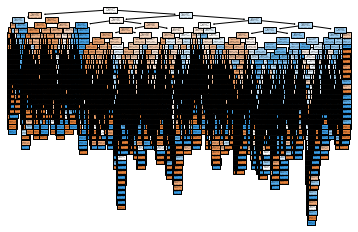

<Figure size 1440x1440 with 0 Axes>

In [28]:
tree_dot = plot_tree(grid_search_results.best_estimator_.estimators_[0],
                filled=True)
plt.figure(figsize=(20,20))
plt.show()

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [29]:
#I would search over different valuese for # of trees and # of features
#given to each tree. These values should vary based on our dataset sample
#size, and our specific dataset's number of features, so they make great
#candidates to have impact on overall performance

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [30]:
#For this part, I would choose values spaced evenly larger and smaller 
#than the default hyperparameter values. If further optimization is required
#you could then perform a further search around the area that give you
#the best scores off of the first optimization. 

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=81)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                     remainder="passthrough"
                                    )
n_estimators = [ 50, 100, 150]
n_features = [4, 8, 12]

pipe = make_pipeline(preprocess,
                    GridSearchCV(rf,
                                param_grid = [{'n_estimators': n_estimators,
                                              'max_features': n_features}],
                                return_train_score=True,
                                n_jobs=2))
  
pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results.best_score_)
print(f"Best train alpha: ", grid_search_results.best_params_)
print(f"Test score:", pipe.score(X_test, y_test))

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-

Best train score:  0.7932967079766621
Best train alpha:  {'max_features': 12, 'n_estimators': 150}
Test score: 0.7908149359498501


## RandomForestClassifier (optimal hyperparameters)
    - Best train score:  0.7936248655489481
    - Best train alpha:  {'max_features': 12, 'n_estimators': 150}
    - Test score: 0.792068683565004


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'feature importance across features for best random forest')

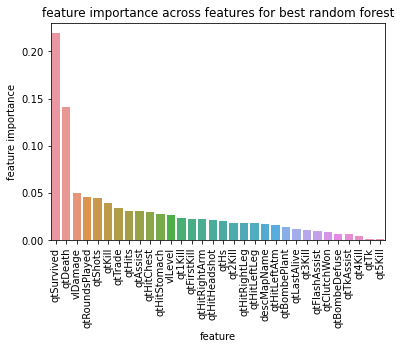

In [32]:
import seaborn as sns

best_rf = grid_search_results.best_estimator_
feat_imps = zip(feature_names, best_rf.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('feature importance')
ax.set_xlabel('feature')
ax.set_title('feature importance across features for best random forest')

 - top 3 features
     - 1) qtSurvived
     - 2) qtDeath
     - 3) vlDamage
 - Compare to 1.9, there are two features that are exactly the same; those are qtSruvived and qtDeath. 
 I think those are perfectly valid features to determine if a gamer is going to be a winner or not. 
 Since they show how many times they have survived and died in the game. However, the third feature is different. 
 in 1.9, the third feature was qtTrade (Numerical (Number of trade kills)). The number of trade kills is when a
 player kills the enemy right after the enemy kills the player's teammate. However, in this case, the third most
 important feature is vlDamage - Numerical (Total match Damage).vlDamage shows how much damage the player 
 has received, and I think vlDamage tends to be a better estimator than qtTrade. Killing an enemy after the enemy
 kills your teammate does not mean you are good player, however, the damage receive indicates how much life level
 an avatar has left in the game. 

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate = [.01, .1, .2]
n_estimators = [50, 100, 200]
max_depth = [2,3,6]

gbc = GradientBoostingClassifier(random_state=81)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                     remainder="passthrough"
                                    )
pipe = make_pipeline(preprocess,
                    GridSearchCV(gbc,
                                param_grid = [{'learning_rate': learning_rate, 
                                              'n_estimators': n_estimators,
                                              'max_depth': max_depth}],
                                return_train_score=True,
                                cv=5,
                                n_jobs=2))
  
pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results.best_score_)
print(f"Best train alpha: ", grid_search_results.best_params_)
print(f"Test score:", pipe.score(X_test, y_test))


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was pass

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was pass

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was pass

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was pass

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was pass

Best train score:  0.8012946637707081
Best train alpha:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Test score: 0.8004633415099482



## GradientBoostingClassifier
    - Best train score:  0.8010248635933133
    - Best train alpha:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
    - Test score: 0.7999454892341238


In [34]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import TransformerMixin

from scipy.sparse import csr_matrix
 

class DenseTransformer(TransformerMixin):
    def fit(self, X,y=None,**fit_params):
        return self
    
    def transform(self, X, y=None, **fit_params):
        X = csr_matrix(X)
        return X.todense()

learning_rate = [.01, .1, .2]
n_estimators = [50, 100, 200]
max_depth = [2, 3, 6]

hgbc = HistGradientBoostingClassifier(random_state=81)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                     remainder="passthrough"
                                    )
pipe = make_pipeline(preprocess,
                     DenseTransformer(),
                    GridSearchCV(hgbc,
                                param_grid = [{'learning_rate': learning_rate, 
                                              'max_iter': n_estimators,
                                              'max_depth': max_depth}],
                                return_train_score=True,
                                cv=5,
                                n_jobs=2))
  
pipe.fit(X_train, y_train)
grid_search_results = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results.best_score_)
print(f"Best train alpha: ", grid_search_results.best_params_)
print(f"Test score:", pipe.score(X_test, y_test))

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/davitbarblis

Best train score:  0.801754610110302
Best train alpha:  {'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 200}
Test score: 0.7999454892341238


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(



## HistGradientBoostingClassifier
   - Best train score:  0.801754610110302
   - Best train alpha:  {'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 200}
   - Test score: 0.7999454892341238


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [35]:
# kernes was dying when I was running xgboost and 
# I found this solution to be successful in my case

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [36]:
from xgboost import XGBClassifier

eta = [0.01, 0.1, 0.2]
max_depth = [3, 6, 9]
n_estimators = [50, 100, 150]

xgbc = XGBClassifier(random_state=81)
preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                     remainder="passthrough"
                                    )
pipe = make_pipeline(preprocess,
                    GridSearchCV(xgbc,
                                param_grid = [{'eta': eta, 
                                              'max_depth': max_depth,
                                              'n_estimators': n_estimators}],
                                return_train_score=True,
                                cv=5,
                                n_jobs=3))


  
pipe.fit(X_train, y_train)
grid_search_results_xgb = pipe.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results_xgb.best_score_)
print(f"Best train alpha: ", grid_search_results_xgb.best_params_)
print(f"Test score:", pipe.score(X_test, y_test))

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and wi

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

[19:02:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best train score:  0.8021549337762446
Best train alpha:  {'eta': 0.2, 'max_depth': 3, 'n_estimators': 150}
Test score: 0.8007358953393295


## XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation
- Best train score:  0.8021549337762446
- Best train alpha:  {'eta': 0.2, 'max_depth': 3, 'n_estimators': 150}
- Test score: 0.8007358953393295

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

- XGBOOST: Test score - 0.8002452984464432
- HISTGRADIENTBOOSTINGCLASSIFIER: Test score - 0.8018834267278946
- GRADIENTBOOSTINGCLASSIFIER: Test score - 0.8010248635933133
- Default Decision Tree: Test score - 0.7889913510891042
- Optimized Random Forest: Test score - 0.7936248655489481



- HISTGRADIENTBOOSTINGCLASSIFIER seems to perform the best, but the margin is very very small between the boosting trees.I would likely choose the histgradientboostingclassifier since it runs much faster than the other boosting algorithms and also has the best performance on the test set!

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'feature importance across features for best XGBoost')

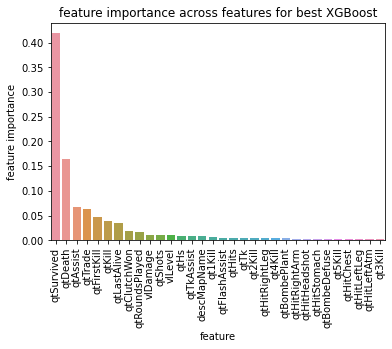

In [37]:
te_feature_names = preprocess.named_transformers_["targetencoder"].get_feature_names()
feature_names = num_features + te_feature_names
best_xgb = grid_search_results_xgb.best_estimator_
xgb_feat_imps = zip(feature_names, best_xgb.feature_importances_)
_xgb_feats, xgb_imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, xgb_feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(_xgb_feats), list(xgb_imps))
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('feature importance')
ax.set_xlabel('feature')
ax.set_title('feature importance across features for best XGBoost')

- The first two features (qtSurvived, qtDeath) seem to be the same for most of the models. However, the third    
  feature seems to be varying for all the models. In this case, we have a qtAssist which I believe is the most
  appropriate comparing to other model's third features. However, it does not mean that the other model's features
  are not the great choices. 

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [38]:
top_7_xgb_feats = _xgb_feats[:7]
feature_names = num_features + te_feature_names
for ele in feature_names:
    if ele  in top_7_xgb_feats:
        feature_names.remove(ele)

columns_to_drop = feature_names
print(columns_to_drop)

['qtAssist', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'vlDamage', 'qtHits', 'qtShots', 'qtClutchWon', 'qtRoundsPlayed', 'vlLevel', 'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg', 'descMapName']


In [39]:
eta = [.01, .1, .2]
max_depth = [3, 6, 9]
n_estimators = [50, 100, 150]
xgbc_top_feat = XGBClassifier(random_state=81)
preprocess_xgbc_top_feat = make_column_transformer((StandardScaler(), num_features),
                                    (TargetEncoder(handle_unknown='ignore'),categorical_variables),
                                    ("drop", columns_to_drop),
                                     remainder="passthrough"
                                    )
pipe_top_xgb = make_pipeline(preprocess_xgbc_top_feat,
                    GridSearchCV(xgbc_top_feat,
                                param_grid = [{'eta': eta, 
                                              'max_depth': max_depth,
                                              'n_estimators': n_estimators}],
                                return_train_score=True,
                                cv=5,
                                n_jobs=3,
                                verbose=True))
  
pipe_top_xgb.fit(X_train, y_train)
grid_search_results_xgb_top = pipe_top_xgb.named_steps['gridsearchcv']
print(f"Best train score: ", grid_search_results_xgb_top.best_score_)
print(f"Best train alpha: ", grid_search_results_xgb_top.best_params_)
print(f"Test score:", pipe_top_xgb.score(X_test, y_test))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do t

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

[18:46:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

[19:17:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best train score:  0.8021549337762446
Best train alpha:  {'eta': 0.2, 'max_depth': 3, 'n_estimators': 150}
Test score: 0.8007358953393295


- Best train score:  0.8021549337762446
- Best train alpha:  {'eta': 0.2, 'max_depth': 3, 'n_estimators': 150}
- Test score: 0.8007358953393295

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [40]:
from sklearn.metrics import brier_score_loss
xgb_best_estimator = grid_search_results_xgb.best_estimator_

xgb_best_estimator.fit(X_train,y_train)
print(xgb_best_estimator.feature_importances_)
predictions = xgb_best_estimator.predict(X_test)
brier_score = brier_score_loss(predictions, y_test)
brier_score

[19:18:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

[0.03845305 0.06831728 0.16463135 0.00873171 0.00370365 0.00398251
 0.00465697 0.00864446 0.00700337 0.00461416 0.002417   0.00422456
 0.0035836  0.         0.04725899 0.01186644 0.00539521 0.01081645
 0.03570413 0.01819879 0.01658446 0.00831691 0.01026101 0.41863924
 0.06287665 0.00558288 0.00373057 0.00335805 0.00372048 0.00312997
 0.00379829 0.0033297  0.00446812]


0.1992641046606705

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

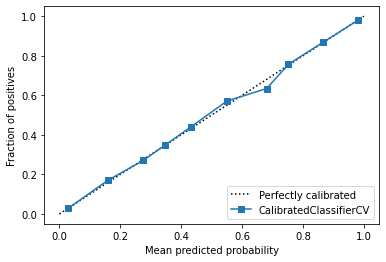

In [43]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay


cal_svc_sigmoid = CalibratedClassifierCV(xgb_best_estimator, cv='prefit', method='sigmoid')
cal_svc_sigmoid.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(
    cal_svc, X_test, y_test, n_bins=10)

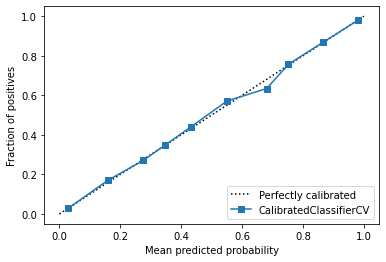

In [41]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

cal_svc = CalibratedClassifierCV(xgb_best_estimator, cv='prefit', method='isotonic')
cal_svc.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(
    cal_svc, X_test, y_test, n_bins=10)

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [45]:
from sklearn.metrics import brier_score_loss
xgb_best_estimator = grid_search_results_xgb.best_estimator_

xgb_best_estimator.fit(X_calib,y_calib)
print(xgb_best_estimator.feature_importances_)
predictions = xgb_best_estimator.predict(X_test)
brier_score = brier_score_loss(predictions, y_test)
brier_score

/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davitbarblishvili/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

[19:26:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.02296208 0.04800389 0.14881863 0.00809401 0.00916697 0.00795123
 0.         0.00994952 0.01255952 0.00810288 0.00662557 0.00605965
 0.         0.         0.04570584 0.01305672 0.00991008 0.01438734
 0.03109679 0.01663926 0.02130649 0.00847261 0.01081794 0.41567722
 0.05576151 0.01134017 0.00766588 0.00712787 0.00725102 0.0094253
 0.00779167 0.00932871 0.00894364]


0.20114472608340148

yes, looks like it performs little better when using calibarated data